In [17]:
#pip install selenium
import sys
import urllib
import urllib.request
import pandas as pd
import os 
import numpy as np
import urllib.request
import urllib.parse
import urllib.error
from bs4 import BeautifulSoup
import ssl
import json
import ast
import os
from urllib.request import Request, urlopen
import time
import urllib.request
import urllib.error
import requests
import random
os.chdir('/Users/saurabhkurjekar/Desktop/RE Docs/RE_Scraping') 

In [18]:
ziplist=[ '30274']#, '78759', '78749', '78723', '78705', '78750', '78717']
len(ziplist)

1

# Fetching all Pages and URLs to be scraped

In [20]:
# Side Cell1
# Getting All URLs from the homepage


# For ignoring SSL certificate errors


list=[]
# zip='30310'

# ziplist=['30308']

for zip in (ziplist):
    for page_var in ('1_p','2_p','3_p','4_p','5_p'):
        ctx = ssl.create_default_context()
        ctx.check_hostname = False
        ctx.verify_mode = ssl.CERT_NONE
        url='https://www.zillow.com/homes/for_sale/' + zip+"/"+page_var   #Postmates
        req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()

        # Creating a BeautifulSoup object of the html page for easy extraction of data.

        soup = BeautifulSoup(webpage, 'html.parser')
        html = soup.prettify('utf-8')
        property_json = {}
        for link in soup.find_all('a'):
            list.append(link.get('href'))
            print(list)
        if len(list)%2 ==0:
            time.sleep(10)

dfObj = pd.DataFrame(list,columns =['links'])
dfObj.dropna
dfObj1=dfObj[dfObj['links'].str.contains("homedetails",na=False)]
dfObj1.drop_duplicates(subset=None, keep="first", inplace=True)
links_from_Zillow = dfObj1['links'].tolist()
links_from_Zillow
for url in links_from_Zillow:
    print(url)

In [19]:
dfObj1.shape

(0, 1)

# Getting metrics from the urls

In [6]:
# For ignoring SSL certificate errors

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Input from user
Detail_Short=[]
Title=[]
Number_of_Rooms=[]
Floor_Size=[]
Street=[]
Locality=[]
Region=[]
Postal_Code=[]
Price=[]
Image=[]
Time_on_Zillow=[]
Rent_Zestimate=[]
Zestimate=[]
link=[]

Detail_Short1=0
Title1='0'
Number_of_Rooms1='0'
Floor_Size1='0'
Street1='0'
Locality1='0'
Region1='0'
Postal_Code1='0'
Price1='0'
Image1='0'
Time_on_Zillow1='0'
Rent_Zestimate1='0'
Zestimate1='0'
link1='0'

for url in links_from_Zillow:
    # For ignoring SSL certificate errors

    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE
    headers = {
    'authority': 'scrapeme.live',
    'dnt': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.61 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'none',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
    }
    # Making the website believe that you are accessing it using a mozilla browser
    print(url)
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    property_json = {}



    for title in soup.findAll('title'):
        property_json['Title'] = title.text.strip()
        Title1=title.text.strip()
        break

    for meta in soup.findAll('meta', attrs={'name': 'description'}):

        property_json['Detail_Short'] = meta['content'].strip()
        if 'Detail_Short' in property_json:
#                 Number_of_Rooms1 = json_data['numberOfRooms']
            Detail_Short1= meta['content'].strip()
        else:
            Detail_Short1 = 0
    for div in soup.findAll('div', attrs={'class': 'character-count-truncated'}):
        property_json['Details_Broad']['Description'] = div.text.strip()

    for (i, script) in enumerate(soup.findAll('script',
                                 attrs={'type': 'application/ld+json'})):



        if i == 0:
            json_data = json.loads(script.text)
            if 'numberOfRooms' in json_data:
                Number_of_Rooms1 = json_data['numberOfRooms']
            else:
                Number_of_Rooms1 = 0
            if 'floorSize' in json_data:
                Floor_Size1 = json_data['floorSize']['value']
            else:
                Floor_Size1 = 0
            if 'address' in json_data:
                Street1 = json_data['address']['streetAddress']
                Locality1 = json_data['address']['addressLocality']
                Region1 = json_data['address']['addressRegion']
                Postal_Code1 = json_data['address']['postalCode']
            else:
                Street1=0
                Locality1=0
                Region1=0
                Postal_Code1 = 0

        if i == 1:
            json_data = json.loads(script.text)
            if 'offers' in json_data:
                Price1 = json_data['offers']['price']
            else:
                Price1 = 0
            if 'image' in json_data:
                Image1 = json_data['image']
            else:
                Image1 = 0

    result = soup.find(string="Time on Zillow")
    if result:
        Time_on_Zillow1=soup.find(string="Time on Zillow").find_next('div').contents[0]
    else: 
        Time_on_Zillow1=0

    result = soup.find(string="Rent Zestimate")
    if result:
        li = soup.find(string="Rent Zestimate").find_next('div').contents[0]
        children = li.findChildren( recursive=False)
        for child in children:
            if len(child.contents)>0:
                child.contents[0]
                Rent_Zestimate1=child.contents[0]
    else: 
        Rent_Zestimate1=0

    result = soup.find(string="Zestimate")
    if result:
        li = soup.find(string="Zestimate").find_next('div').contents[0]
        children = li.findChildren( recursive=False)
        for child in children:
            if len(child.contents)>0:
                child.contents[0]
                Zestimate1=child.contents[0]
    else: 
        Zestimate1=[]



    Detail_Short.append(Detail_Short1)
    Title.append(Title1)
    Number_of_Rooms.append(Number_of_Rooms1)
    Floor_Size.append(Floor_Size1)
    Street.append(Street1)
    Locality.append(Locality1)
    Region.append(Region1)
    Postal_Code.append(Postal_Code1)
    Price.append(Price1)
    Image.append(Image1)

    Time_on_Zillow.append(Time_on_Zillow1)
    Rent_Zestimate.append(Rent_Zestimate1)
    Zestimate.append(Zestimate1)

    link.append(url)
    
    if len(link)%30 ==0:
        time.sleep(240)



In [9]:

df = pd.DataFrame(np.column_stack([
Title,
Number_of_Rooms,
Floor_Size,
Street,
Locality,
Region,
Postal_Code,
Price,
Image,
Time_on_Zillow,
Rent_Zestimate,
Zestimate,
link,
Detail_Short]), 
columns=[
'Title',
'Number_of_Rooms',
'Floor_Size',
'Street',
'Locality',
'Region',
'Postal_Code',
'Price',
'Image',
'Time_on_Zillow',
'Rent_Zestimate',
'Zestimate',
'link',
'Detail_Short'])
df.to_csv('scraped_data.csv')
df.head(3)


,Title,Number_of_Rooms,Floor_Size,Street,Locality,Region,Postal_Code,Price,Image,Time_on_Zillow,Rent_Zestimate,Zestimate,link,Detail_Short


In [ ]:
# df.sample(3)
# df['Rent_Zestimate']=df['Rent_Zestimate'].str.replace('[a-zA-Z]', '')
# df['Rent_Zestimate']=df['Rent_Zestimate'].str.replace('$', '')
# df['Rent_Zestimate']=df['Rent_Zestimate'].str.replace(',', '').astype(int)
# df.fillna(0)
# df['Time_on_Zillow']=df['Time_on_Zillow'].str.extract('(\d+)')
# # df = df.astype({"Rent_Zestimate": int})
# df.dtypes
# df.head(20)

In [2]:
# d1=pd.read_csv('scraped_data_v1_05_17_20.csv')
# d2=pd.read_csv('scraped_data_v2_05_18_20.csv')
# d3=pd.read_csv('scraped_data_v3.csv')
# d4=pd.read_csv('scraped_data_v4.csv')
# d5=pd.read_csv('scraped_data_v5.csv')
# d6=pd.read_csv('scraped_data_v6.csv')
# d7=pd.read_csv('scraped_data_v7.csv')
# d8=pd.read_csv('scraped_data_v8.csv')
# d9=pd.read_csv('scraped_data_v9.csv')
# d10=pd.read_csv('scraped_data_v10.csv')
# d11=pd.read_csv('scraped_data_v11.csv')
# d12=pd.read_csv('scraped_data_v12_Austin.csv')

In [10]:
df_combined = d1.append([d2, d3, d4, d5, d6, d7, d8, d9, d10, d11, d12], sort=False)
df_combined=df_combined.drop(columns=['Unnamed: 0'])
df_combined.sample(3)

,Title,Number_of_Rooms,Floor_Size,Street,Locality,Region,Postal_Code,Price,Image,Time_on_Zillow,Rent_Zestimate,Zestimate,link,Detail_Short
43,"615 Cofield Dr, Hapeville, GA 30354 | MLS #870...",3.0,"1,425",615 Cofield Dr,Hapeville,GA,30354,209000,NaN,157 days,"$1,308",Est. payment,https://www.zillow.com/homedetails/615-Cofield...,"615 Cofield Dr , Hapeville, GA 30354-1001 is a..."
109,"3300 Windy Ridge Pkwy SE UNIT 1609, Atlanta, G...",2.0,"1,300",3300 Windy Ridge Pkwy SE UNIT 1609,Atlanta,GA,30339,370000,https://photos.zillowstatic.com/p_h/IS7msywmc5...,76 days,"$1,850",Est. payment,https://www.zillow.com/homedetails/3300-Windy-...,"3300 Windy Ridge Pkwy SE Unit 1609, Atlanta, G..."
220,"569 Jones Ave NW, Atlanta, GA 30314 | MLS #665...",0.0,"1,385",569 Jones Ave NW,Atlanta,GA,30314,175000,https://photos.zillowstatic.com/p_h/ISz3tsfj21...,175 days,"$1,350",Est. payment,https://www.zillow.com/homedetails/569-Jones-A...,"Zillow has 8 photos of this $175000 0 bed, bat..."


In [11]:
df_combined.sample(10)
df_combined.to_csv('scraped_data_combined.csv')

In [24]:
url='https://www.zillow.com/homes/for_sale/94608/1p/'

In [33]:
import requests
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

#     webpage = urlopen(req).read()
url = 'https://www.zillow.com/homes/for_sale/94608/1p/'
proxies = {
    "http": 'http://54.234.254.119:80', 
    "https": 'https://54.234.254.119:80'
}
req = Request(url, headers={'User-Agent': 'Mozilla/5.0'},proxies=proxies)
# response = requests.get(url,proxies=proxies,headers={'User-Agent': 'Mozilla/5.0'})
print(req.json())

TypeError: __init__() got an unexpected keyword argument 'proxies'

In [20]:
# For ignoring SSL certificate errors

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

# Input from user
Detail_Short=[]
Title=[]
Number_of_Rooms=[]
Floor_Size=[]
Street=[]
Locality=[]
Region=[]
Postal_Code=[]
Price=[]
Image=[]
Time_on_Zillow=[]
Rent_Zestimate=[]
Zestimate=[]
link=[]

Detail_Short1=0
Title1='0'
Number_of_Rooms1='0'
Floor_Size1='0'
Street1='0'
Locality1='0'
Region1='0'
Postal_Code1='0'
Price1='0'
Image1='0'
Time_on_Zillow1='0'
Rent_Zestimate1='0'
Zestimate1='0'
link1='0'

for url in links_from_Zillow:
    # For ignoring SSL certificate errors
    
    ctx = ssl.create_default_context()
    ctx.check_hostname = False
    ctx.verify_mode = ssl.CERT_NONE
    
    user_agent_list = [
   #Chrome
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
    'Mozilla/5.0 (Windows NT 5.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.2; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.90 Safari/537.36',
    'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/57.0.2987.133 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/55.0.2883.87 Safari/537.36',
    #Firefox
    'Mozilla/4.0 (compatible; MSIE 9.0; Windows NT 6.1)',
    'Mozilla/5.0 (Windows NT 6.1; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; WOW64; Trident/5.0)',
    'Mozilla/5.0 (Windows NT 6.1; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (Windows NT 6.2; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (Windows NT 10.0; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.0; Trident/5.0)',
    'Mozilla/5.0 (Windows NT 6.3; WOW64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 9.0; Windows NT 6.1; Trident/5.0)',
    'Mozilla/5.0 (Windows NT 6.1; Win64; x64; Trident/7.0; rv:11.0) like Gecko',
    'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; WOW64; Trident/6.0)',
    'Mozilla/5.0 (compatible; MSIE 10.0; Windows NT 6.1; Trident/6.0)',
    'Mozilla/4.0 (compatible; MSIE 8.0; Windows NT 5.1; Trident/4.0; .NET CLR 2.0.50727; .NET CLR 3.0.4506.2152; .NET CLR 3.5.30729)'
    ]
    #Pick a random user agent
    user_agent = random.choice(user_agent_list)
    #Set the headers 
    headers = {'User-Agent': user_agent}

    # Making the website believe that you are accessing it using a mozilla browser
    print(url)
    req = Request(url, headers=headers)
    webpage = urlopen(req).read()

    # Creating a BeautifulSoup object of the html page for easy extraction of data.

    soup = BeautifulSoup(webpage, 'html.parser')
    html = soup.prettify('utf-8')
    property_json = {}



    for title in soup.findAll('title'):
        property_json['Title'] = title.text.strip()
        Title1=title.text.strip()
        break

    for meta in soup.findAll('meta', attrs={'name': 'description'}):

        property_json['Detail_Short'] = meta['content'].strip()
        if 'Detail_Short' in property_json:
#                 Number_of_Rooms1 = json_data['numberOfRooms']
            Detail_Short1= meta['content'].strip()
        else:
            Detail_Short1 = 0
    for div in soup.findAll('div', attrs={'class': 'character-count-truncated'}):
        property_json['Details_Broad']['Description'] = div.text.strip()

    for (i, script) in enumerate(soup.findAll('script',
                                 attrs={'type': 'application/ld+json'})):



        if i == 0:
            json_data = json.loads(script.text)
            if 'numberOfRooms' in json_data:
                Number_of_Rooms1 = json_data['numberOfRooms']
            else:
                Number_of_Rooms1 = 0
            if 'floorSize' in json_data:
                Floor_Size1 = json_data['floorSize']['value']
            else:
                Floor_Size1 = 0
            if 'address' in json_data:
                Street1 = json_data['address']['streetAddress']
                Locality1 = json_data['address']['addressLocality']
                Region1 = json_data['address']['addressRegion']
                Postal_Code1 = json_data['address']['postalCode']
            else:
                Street1=0
                Locality1=0
                Region1=0
                Postal_Code1 = 0

        if i == 1:
            json_data = json.loads(script.text)
            if 'offers' in json_data:
                Price1 = json_data['offers']['price']
            else:
                Price1 = 0
            if 'image' in json_data:
                Image1 = json_data['image']
            else:
                Image1 = 0

    result = soup.find(string="Time on Zillow")
    if result:
        Time_on_Zillow1=soup.find(string="Time on Zillow").find_next('div').contents[0]
    else: 
        Time_on_Zillow1=0

    result = soup.find(string="Rent Zestimate")
    if result:
        li = soup.find(string="Rent Zestimate").find_next('div').contents[0]
        children = li.findChildren( recursive=False)
        for child in children:
            if len(child.contents)>0:
                child.contents[0]
                Rent_Zestimate1=child.contents[0]
    else: 
        Rent_Zestimate1=0

    result = soup.find(string="Zestimate")
    if result:
        li = soup.find(string="Zestimate").find_next('div').contents[0]
        children = li.findChildren( recursive=False)
        for child in children:
            if len(child.contents)>0:
                child.contents[0]
                Zestimate1=child.contents[0]
    else: 
        Zestimate1=[]



    Detail_Short.append(Detail_Short1)
    Title.append(Title1)
    Number_of_Rooms.append(Number_of_Rooms1)
    Floor_Size.append(Floor_Size1)
    Street.append(Street1)
    Locality.append(Locality1)
    Region.append(Region1)
    Postal_Code.append(Postal_Code1)
    Price.append(Price1)
    Image.append(Image1)

    Time_on_Zillow.append(Time_on_Zillow1)
    Rent_Zestimate.append(Rent_Zestimate1)
    Zestimate.append(Zestimate1)

    link.append(url)

#     if len(link)%1 ==0:
    time.sleep(10)



https://www.zillow.com/homedetails/1560-Sanborn-Ave-San-Jose-CA-95110/64690207_zpid/
https://www.zillow.com/homedetails/Palm-St-San-Jose-CA-95110/2118804522_zpid/
https://www.zillow.com/homedetails/1233-Locust-St-San-Jose-CA-95110/19683612_zpid/
https://www.zillow.com/homedetails/175-W-Saint-James-St-UNIT-1308-San-Jose-CA-95110/82963751_zpid/
https://www.zillow.com/homedetails/544-Quailbrook-Ct-San-Jose-CA-95110/19574267_zpid/
https://www.zillow.com/homedetails/95-Hobson-St-APT-6A-San-Jose-CA-95110/19574491_zpid/
https://www.zillow.com/homedetails/1394-Palm-St-San-Jose-CA-95110/19685051_zpid/
https://www.zillow.com/homedetails/74-Ryland-Park-Way-San-Jose-CA-95110/59683008_zpid/
https://www.zillow.com/homedetails/1446-Ford-Ave-San-Jose-CA-95110/19684074_zpid/
https://www.zillow.com/homedetails/38-N-Almaden-Blvd-UNIT-902-San-Jose-CA-95110/82953863_zpid/
https://www.zillow.com/homedetails/38-N-Almaden-Blvd-UNIT-1901-San-Jose-CA-95110/82961365_zpid/
https://www.zillow.com/homedetails/1550-

https://www.zillow.com/homedetails/3223-Hannah-St-Oakland-CA-94608/299074895_zpid/
https://www.zillow.com/homedetails/916-63rd-St-Oakland-CA-94608/24757111_zpid/
https://www.zillow.com/homedetails/3008-Myrtle-St-Oakland-CA-94608/2081258023_zpid/
https://www.zillow.com/homedetails/815-35th-St-Oakland-CA-94608/24742087_zpid/
https://www.zillow.com/homedetails/1014-54th-St-Oakland-CA-94608/24751979_zpid/
https://www.zillow.com/homedetails/3201-Adeline-St-Oakland-CA-94608/299071768_zpid/
https://www.zillow.com/homedetails/3218-Market-St-Oakland-CA-94608/24741850_zpid/
https://www.zillow.com/homedetails/4-Captain-Dr-E405-Emeryville-CA-94608/24821847_zpid/
https://www.zillow.com/homedetails/1081-65th-St-Oakland-CA-94608/24757338_zpid/
https://www.zillow.com/homedetails/960-45th-St-Oakland-CA-94608/24751828_zpid/
https://www.zillow.com/homedetails/1054-63rd-St-Oakland-CA-94608/24757272_zpid/
https://www.zillow.com/homedetails/5872-Beaudry-St-Emeryville-CA-94608/24821626_zpid/
https://www.zill

<!DOCTYPE html>
<html class="ie gte-ie9 no-js zsg-theme-modernized null" itemscope="" itemtype="http://schema.org/Organization" lang="en" xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#" xmlns:product="http://ogp.me/ns/product#">
<head>
<link href="//fonts.googleapis.com" rel="preconnect"/><link href="//maps.googleapis.com" rel="preconnect"/><link href="//c.go-mpulse.net" rel="preconnect"/><link href="//s.zillow.net" rel="preconnect"/><link href="//keystone.zillow.com" rel="preconnect"/><link href="//fonts.gstatic.com" rel="preconnect"/><link href="//www.google-analytics.com" rel="preconnect"/><link href="//sb.scorecardresearch.com" rel="preconnect"/><link href="//e.zg-api.com" rel="preconnect"/><link crossorigin="true" href="https://www.zillow.com/graphql/" rel="preconnect"/><link crossorigin="true" href="https://mortgageapi.zillow.com" rel="preconnect"/><meta charset="utf-8"/><script type="application/javascript">
        
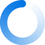
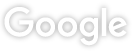

In [76]:
url='https://www.zillow.com/homedetails/1550-Technology-Dr-UNIT-4106-San-Jose-CA-95110/69301898_zpid/'
req = Request(url, headers=headers)
webpage = urlopen(req).read()

# Creating a BeautifulSoup object of the html page for easy extraction of data.

soup = BeautifulSoup(webpage, 'html.parser')
html = soup.prettify('utf-8')
property_json = {}
# result = soup.find(class="sc-sdtwf kDDKua").string="Zestimate"

# mydivs = soup.<class= "sc-sdtwf kDDKua">
mydivs =soup.findAll("div", {"class": "sc-sdtwf kDDKua"})
# if result:
#     li = soup.find(string="Zestimate").next_sibling.strip()
#     li=result.next_sibling

#     children = li.findChildren( recursive=False)
#     for child in children:
#         if len(child.contents)>0:
#             child.contents[0]
#             Zestimate1=child.contents[0]
# else: 
#     Zestimate1=[]
# Zestimate1
mydivs
soup